<a href="https://colab.research.google.com/github/wellmej/Python-DataViz/blob/master/TensorFlow_Clothing_Categorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow MNIST Project - with Clothing Apparel Categorization
In this notebook we will recreate our machine learning algorithm using TF 2.0.
This is the Hello World of Neural Networks

In [ ]:
#
#  URL: https://www.tensorflow.org/tutorials/keras/classification
#

## Import the relevant libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow import keras

#import tensorflow_datasets as tfds

C:\Users\wellmej\AppData\Local\Continuum\anaconda3\envs\py3-TF2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\wellmej\AppData\Local\Continuum\anaconda3\envs\py3-TF2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\wellmej\AppData\Local\Continuum\anaconda3\envs\py3-TF2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16"

In [ ]:
import tensorflow_datasets as tfds
#from tf.data.Dataset import Dataset

In [ ]:
#
# Print TensorFlow version
#
print (tf.__version__)

2.0.0-beta1


In [ ]:
#------------------------------------------------------------------------------------------------------------------------------
# This guide uses the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. 
# The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:
# Fashion MNIST is intended as a drop-in replacement for the classic MNIST dataset—often used as the "Hello, World" of 
# machine learning programs for computer vision. The MNIST dataset contains images of 
# handwritten digits (0, 1, 2, etc) in an identical format to the articles of clothing we'll use here.
# 
# This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. 
# Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points 
# to test and debug code.
# 
# We will use 60,000 images to train the network and 10,000 images to evaluate how accurately the network learned to classify 
# images. You can access the Fashion MNIST directly from TensorFlow, just import and load the data:
#------------------------------------------------------------------------------------------------------------------------------
 

#
# Load the MNIST dataset
#
#   with_info = True     : Loads the data in a 2-tuple structure [input, target]
#   as_supervised = True : Provides a tuple containing info about version, features, # of samples of the dataset
#
#mnist_dataset, mnist_info = tfds.load(name='fashion_mnist', with_info=True, as_supervised=True)

#mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']


##fashion_mnist = keras.datasets.fashion_mnist

##(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [ ]:
#-------------------------------------------
#  Original Data Load from Website Example
#-------------------------------------------

#------------------------------------------------------------------------------------------------------------------------------
# This guide uses the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. 
# The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:
# Fashion MNIST is intended as a drop-in replacement for the classic MNIST dataset—often used as the "Hello, World" of 
# machine learning programs for computer vision. The MNIST dataset contains images of 
# handwritten digits (0, 1, 2, etc) in an identical format to the articles of clothing we'll use here.
# 
# This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. 
# Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points 
# to test and debug code.
# 
# We will use 60,000 images to train the network and 10,000 images to evaluate how accurately the network learned to classify 
# images. You can access the Fashion MNIST directly from TensorFlow, just import and load the data:
#------------------------------------------------------------------------------------------------------------------------------

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
#--------------------------------------
# Do Not Use
#--------------------------------------

#from tensorflow.contrib.learn.python.learn.datasets.mnist import extract_images, extract_labels
#from tensorflow import extract_images, extract_labels
#from tensorflow.examples.tutorials.mnist import input_data
#
#with open('C:/Users/wellmej/Documents/PLD-SmartRide/Admin/Training/Udemy-Data Science/Data/MNIST-Clothing/train-images-idx3-ubyte.gz', 'rb') as f:
#  train_images = extract_images(f)
#with open('C:/Users/wellmej/Documents/PLD-SmartRide/Admin/Training/Udemy-Data Science/Data/MNIST-Clothing/train-labels-idx1-ubyte.gz', 'rb') as f:
#  train_labels = extract_labels(f)
#
#with open('C:/Users/wellmej/Documents/PLD-SmartRide/Admin/Training/Udemy-Data Science/Data/MNIST-Clothing/t10k-images-idx3-ubyte.gz', 'rb') as f:
#  test_images = extract_images(f)
#with open('C:/Users/wellmej/Documents/PLD-SmartRide/Admin/Training/Udemy-Data Science/Data/MNIST-Clothing/t10k-labels-idx1-ubyte.gz', 'rb') as f:
#  test_labels = extract_labels(f)


# "C:/Users/wellmej/Documents/PLD-SmartRide/Admin/Training/Udemy-Data Science/Data/MNIST-Clothing"

In [ ]:
#
#  Notes
#
# Hyperparameters  vs  Parameter
# ---------------      ---------
#   Width               Weights (w)
#   Depth               Biases  (b)
#   Learning Rate
#
# Hyperparameters are set by us before optimizing, while Parameters are found by optimizing
#
# In order to have deep nets and find complex relationships through arbitrary functions, we need non-linearities. Otherwise
# the function will not give "deep learning" results.

#
# Non-Linearity (Activation Function aka Transfer Function)
#
# Example: Input is linear "Change in temperature", output is binary, either "put on Jacket" or "keep carrying Jacket" 
#
# Common Activation Functions
#
#  1. Sigmoid (Logistic function)      Range: (0,1)
#  2. TanH (hyperbolic tangent)        Range: (-1,1)
#  3. ReLu (rectified linear unit)     Range: (0,infinity)
#  4. softmax                          Range: (0,1) - yields a probability distribution. The sum of all softmax
#                                                     outputs is equal to 1. (0.1, 0.2, 0.7) - for example
#
#
# Backpropagation of errors
#
#  Gradient descent used to update the loss or error. Difference between targets and outputs.
#  Derive appropriate updates as if we had targets.
#
#
# Overfitting/Underfitting - Common topics on job interviews (to explain what these are)
#
# Overfitting: The training has focused on the particular training set so much, it has "missed the point".
#              Example: Graph comes to match almost every point of the output.
#                       You believe you can predict the euro and dollar exchange rate, but instead you just modeled
#                       the noise. (Bed meme example - bed/mattress that only fits only one or a few indivduals )
#
# Underfitting: The model has not captured the underlying logic of the data.
#               Example: Linear model where the graph is a sigmoid or curvey line
# 
#  How to identify overfitting:
#   1. Divide dataset into three parts
#      a. Training Data     (80%, 70%) -Common splits
#      b. Validation Data   (10%, 20%)
#      c. Test Data         (10%, 10%)
#
#   2. If validation_loss starts increasing, that is a red flag that overfitting is occurring.
#
#   3. STOP processing if step 2 occurs
#
#   Note: Training and validation datasets should be separate, and not overlap
#
#
# N-Fold Cross Validation
#
#  Approach to combine training and validation data in one dataset, but still keeps test datasets separate.
#  Cons: Model may be overfitted
#
#
# Early Stopping
#
# Rules to indicate model has been trained
#
#  1. Train for a preset number of epochs
#  2. Stop when the loss updates become very small (less than 0.001)
#  3. Validation data set strategy - training loss is flat, but validation cost starts increasing. Stop then.
#
#
# Initialization
# --------------
#
#  Xavier Initialization (Glorot initalization)
#
#   Uniform Xavier Initialization
#     : Draw each weight, w, from a random uniform distribution
#       in [-x,x] x = sqrt(6/(inputs + outputs))
#
#   Normal Xavier Initialization
#     : Draw each weight, w, from a normal uniform distribution with a mean of zero, and standard deviation
#       sigma = sqrt(2/(inputs + outputs))
#
#
#
#  Momentum
#  --------
#
#  Basically we want the learning rate (eta) to be small enough so we gently descend and do not oscillate or diverge from
#  the minimum, and we want it big enough so we can reach it in a manageble amount of time. Momentum keeps the process going
#  so we find the true low point, and not a false minimum that is not the true bottom. Learning rate schedules help pick the
#  best of both worlds when dealing with choosing a Learning Rate.
#
#  Learning Rater Schedule
#  -----------------------
#  Uses an exponential way to dimenish the eta learning rate that smooths is out.
#
#   AdaGrad - Adaptive gradient algorithm
#
#   RMSProp - Root mean square propagation
#
#   Adam    - Adaptive moment estimation
#



In [ ]:
#------------------------------------------------------------------------------------------------------------------------------
# Loading the dataset returns four NumPy arrays:
# 
# The train_images and train_labels arrays are the training set—the data the model uses to learn.
# The model is tested against the test set, the test_images, and test_labels arrays.
# The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The labels are an array of integers, 
# ranging from 0 to 9. These correspond to the class of clothing the image represents:
# 
# Label	Class
# 0	T-shirt/top
# 1	Trouser
# 2	Pullover
# 3	Dress
# 4	Coat
# 5	Sandal
# 6	Shirt
# 7	Sneaker
# 8	Bag
# 9	Ankle boot
#
# Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use 
# later when plotting the images:
#
#------------------------------------------------------------------------------------------------------------------------------


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
# Explore the data
# Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the 
# training set, with each image represented as 28 x 28 pixels:

train_images.shape

(60000, 28, 28)

In [ ]:
# Likewise, there are 60,000 labels in the training set:

len(train_labels)

60000

In [ ]:
# Each label is an integer between 0 and 9:

train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
# There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

test_images.shape

(10000, 28, 28)

In [ ]:
# And the test set contains 10,000 images labels:

len(test_labels)

10000

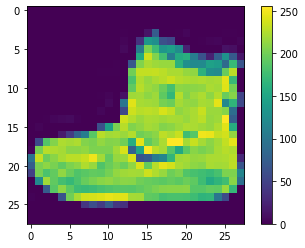

In [ ]:
#------------------------------
# Preprocess the data
#------------------------------
# The data must be preprocessed before training the network. If you inspect the first image in the training set, 
# you will see that the pixel values fall in the range of 0 to 255:

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

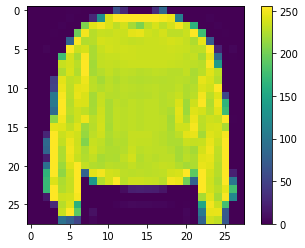

In [ ]:
#------------------------------
# Preprocess the data
#------------------------------
# The data must be preprocessed before training the network. If you inspect the 8th image in the training set, 
# you will see that the pixel values fall in the range of 0 to 255:

plt.figure()
plt.imshow(train_images[7])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#------------------------------
# Scale the Data
#------------------------------
# We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, we divide the values by 255.
# It's important that the training set and the testing set are preprocessed in the same way:

train_images = train_images / 255.0

test_images = test_images / 255.0

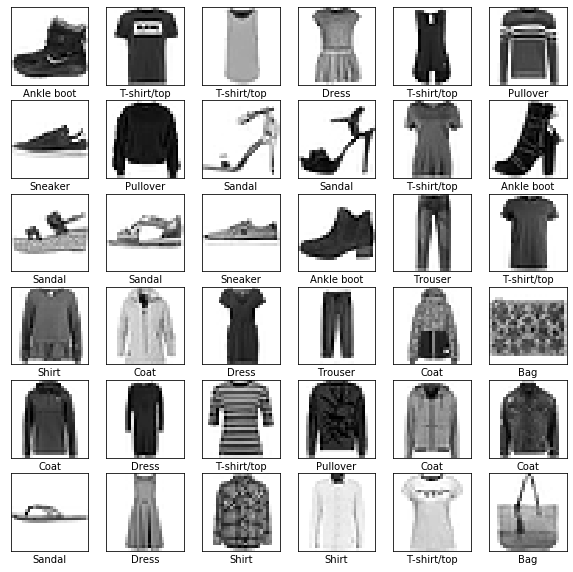

In [ ]:
# ------------------------------
# Display first 36 images of the training set
#------------------------------
# Display the first 36 images from the training set and display the class name below each image. Verify that the 
# data is in the correct format and we're ready to build and train the network.

n = 36  # Note: subplot parameter product must equal n (example 6 * 6 = 36)  cmap=plt.cm.RdYlGn

plt.figure(figsize=(10,10))
for i in range(n):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

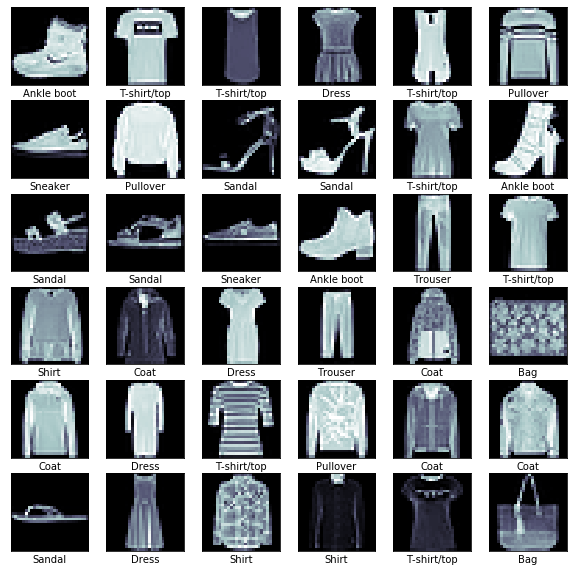

In [ ]:
#------------------------------
# Display first 36 images - as original x-ray colors (bone)
#------------------------------
# Display the first 25 images from the training set and display the class name below each image. Verify that the 
# data is in the correct format and we're ready to build and train the network.

n = 36  # Note: subplot parameter product must equal n (example 6 * 6 = 36)  

plt.figure(figsize=(10,10))
for i in range(n):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.bone)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
#------------------------------
# Build the model
#------------------------------
# Building the neural network requires configuring the layers of the model, then compiling the model.

# Setup the layers
# The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. 
# And, hopefully, these representations are more meaningful for the problem at hand.

# Most of deep learning consists of chaining together simple layers. Most layers, like tf.keras.layers.Dense, have 
# parameters that are learned during training.

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


In [ ]:
#------------------------------
# Compile the Model
#------------------------------
# 
# The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a 2d-array (of 28 by 28 
# pixels), to a 1d-array of 28 * 28 = 784 pixels. Think of this layer as unstacking rows of pixels in the image and lining 
# them up. This layer has no parameters to learn; it only reformats the data.
# 
# After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. 
# These are densely-connected, or fully-connected, neural layers. The first Dense layer has 128 nodes (or neurons). 
# The second (and last) layer is a 10-node softmax layer—this returns an array of 10 probability scores that sum to 1. 
# Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.
# 
# Compile the model
# Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:
# 
# Loss function —This measures how accurate the model is during training. We want to minimize this function to "steer" the 
# model in the right direction.
# Optimizer —This is how the model is updated based on the data it sees and its loss function.
# Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images 
# that are correctly classified.

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
print(train_images.shape)

(60000, 28, 28)


In [ ]:
#------------------------------
# Train the model
#------------------------------
# Training the neural network model requires the following steps:
# 
# Feed the training data to the model—in this example, the train_images and train_labels arrays.
# The model learns to associate images and labels.
# We ask the model to make predictions about a test set—in this example, the test_images array. We verify that the 
# predictions match the labels from the test_labels array.
# To start training, call the model.fit method—the model is "fit" to the training data:
EPOCHS = 10

model.fit(train_images, train_labels, epochs=EPOCHS)

W1003 12:38:38.631176 11172 deprecation.py:323] From C:\Users\wellmej\AppData\Local\Continuum\anaconda3\envs\py3-TF2.0\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - ETA: 7:09 - loss: 2.4220 - accuracy: 0.06 - ETA: 26s - loss: 1.5690 - accuracy: 0.4500 - ETA: 17s - loss: 1.3259 - accuracy: 0.535 - ETA: 15s - loss: 1.1989 - accuracy: 0.578 - ETA: 12s - loss: 1.1146 - accuracy: 0.610 - ETA: 11s - loss: 1.0334 - accuracy: 0.641 - ETA: 10s - loss: 1.0006 - accuracy: 0.654 - ETA: 9s - loss: 0.9448 - accuracy: 0.666 - ETA: 9s - loss: 0.9096 - accuracy: 0.68 - ETA: 9s - loss: 0.8844 - accuracy: 0.69 - ETA: 8s - loss: 0.8580 - accuracy: 0.70 - ETA: 8s - loss: 0.8342 - accuracy: 0.71 - ETA: 7s - loss: 0.8155 - accuracy: 0.71 - ETA: 7s - loss: 0.7963 - accuracy: 0.72 - ETA: 7s - loss: 0.7778 - accuracy: 0.73 - ETA: 7s - loss: 0.7640 - accuracy: 0.73 - ETA: 7s - loss: 0.7510 - accuracy: 0.73 - ETA: 7s - loss: 0.7421 - accuracy: 0.74 - ETA: 6s - loss: 0.7318 - accuracy: 0.74 - ETA: 6s - loss: 0.7203 - accuracy: 0.74 - ETA: 6s - loss: 0.7120 - accuracy: 0.74 - ETA: 6s - loss: 0.705

60000/60000 [==============================] - ETA: 13s - loss: 0.4871 - accuracy: 0.812 - ETA: 13s - loss: 0.3572 - accuracy: 0.859 - ETA: 9s - loss: 0.3247 - accuracy: 0.894 - ETA: 11s - loss: 0.3183 - accuracy: 0.895 - ETA: 10s - loss: 0.3293 - accuracy: 0.883 - ETA: 9s - loss: 0.3161 - accuracy: 0.888 - ETA: 9s - loss: 0.3153 - accuracy: 0.88 - ETA: 9s - loss: 0.3284 - accuracy: 0.88 - ETA: 9s - loss: 0.3442 - accuracy: 0.88 - ETA: 9s - loss: 0.3468 - accuracy: 0.87 - ETA: 10s - loss: 0.3429 - accuracy: 0.880 - ETA: 10s - loss: 0.3444 - accuracy: 0.878 - ETA: 9s - loss: 0.3428 - accuracy: 0.879 - ETA: 9s - loss: 0.3435 - accuracy: 0.87 - ETA: 9s - loss: 0.3442 - accuracy: 0.87 - ETA: 9s - loss: 0.3477 - accuracy: 0.87 - ETA: 9s - loss: 0.3511 - accuracy: 0.87 - ETA: 8s - loss: 0.3507 - accuracy: 0.87 - ETA: 8s - loss: 0.3506 - accuracy: 0.87 - ETA: 8s - loss: 0.3483 - accuracy: 0.87 - ETA: 8s - loss: 0.3483 - accuracy: 0.87 - ETA: 8s - loss: 0.3491 - accuracy: 0.87 - ETA: 8s - loss

60000/60000 [==============================] - ETA: 13s - loss: 0.5258 - accuracy: 0.875 - ETA: 5s - loss: 0.3127 - accuracy: 0.896 - ETA: 5s - loss: 0.2888 - accuracy: 0.90 - ETA: 5s - loss: 0.2865 - accuracy: 0.90 - ETA: 5s - loss: 0.2963 - accuracy: 0.89 - ETA: 5s - loss: 0.2877 - accuracy: 0.89 - ETA: 5s - loss: 0.2922 - accuracy: 0.89 - ETA: 5s - loss: 0.2898 - accuracy: 0.89 - ETA: 5s - loss: 0.2900 - accuracy: 0.88 - ETA: 5s - loss: 0.2942 - accuracy: 0.88 - ETA: 4s - loss: 0.2936 - accuracy: 0.88 - ETA: 4s - loss: 0.2936 - accuracy: 0.88 - ETA: 4s - loss: 0.2943 - accuracy: 0.88 - ETA: 4s - loss: 0.2934 - accuracy: 0.88 - ETA: 4s - loss: 0.2905 - accuracy: 0.88 - ETA: 4s - loss: 0.2908 - accuracy: 0.88 - ETA: 4s - loss: 0.2897 - accuracy: 0.88 - ETA: 4s - loss: 0.2893 - accuracy: 0.89 - ETA: 4s - loss: 0.2892 - accuracy: 0.89 - ETA: 4s - loss: 0.2901 - accuracy: 0.89 - ETA: 4s - loss: 0.2913 - accuracy: 0.89 - ETA: 4s - loss: 0.2916 - accuracy: 0.88 - ETA: 4s - loss: 0.2917 - a

60000/60000 [==============================] - ETA: 14s - loss: 0.2194 - accuracy: 0.937 - ETA: 5s - loss: 0.2635 - accuracy: 0.903 - ETA: 5s - loss: 0.2781 - accuracy: 0.90 - ETA: 5s - loss: 0.2546 - accuracy: 0.90 - ETA: 5s - loss: 0.2549 - accuracy: 0.90 - ETA: 5s - loss: 0.2533 - accuracy: 0.91 - ETA: 5s - loss: 0.2543 - accuracy: 0.90 - ETA: 5s - loss: 0.2542 - accuracy: 0.90 - ETA: 5s - loss: 0.2573 - accuracy: 0.90 - ETA: 5s - loss: 0.2548 - accuracy: 0.90 - ETA: 5s - loss: 0.2552 - accuracy: 0.90 - ETA: 4s - loss: 0.2624 - accuracy: 0.90 - ETA: 4s - loss: 0.2624 - accuracy: 0.90 - ETA: 4s - loss: 0.2626 - accuracy: 0.90 - ETA: 4s - loss: 0.2612 - accuracy: 0.90 - ETA: 4s - loss: 0.2621 - accuracy: 0.90 - ETA: 4s - loss: 0.2605 - accuracy: 0.90 - ETA: 4s - loss: 0.2613 - accuracy: 0.90 - ETA: 4s - loss: 0.2619 - accuracy: 0.90 - ETA: 4s - loss: 0.2654 - accuracy: 0.90 - ETA: 4s - loss: 0.2655 - accuracy: 0.90 - ETA: 4s - loss: 0.2662 - accuracy: 0.90 - ETA: 4s - loss: 0.2647 - a

60000/60000 [==============================] - ETA: 20s - loss: 0.1543 - accuracy: 0.968 - ETA: 7s - loss: 0.2081 - accuracy: 0.919 - ETA: 7s - loss: 0.2336 - accuracy: 0.91 - ETA: 6s - loss: 0.2422 - accuracy: 0.90 - ETA: 6s - loss: 0.2428 - accuracy: 0.90 - ETA: 6s - loss: 0.2383 - accuracy: 0.90 - ETA: 6s - loss: 0.2330 - accuracy: 0.90 - ETA: 6s - loss: 0.2413 - accuracy: 0.90 - ETA: 6s - loss: 0.2429 - accuracy: 0.90 - ETA: 6s - loss: 0.2433 - accuracy: 0.90 - ETA: 6s - loss: 0.2459 - accuracy: 0.90 - ETA: 6s - loss: 0.2461 - accuracy: 0.90 - ETA: 6s - loss: 0.2455 - accuracy: 0.90 - ETA: 6s - loss: 0.2448 - accuracy: 0.90 - ETA: 6s - loss: 0.2424 - accuracy: 0.90 - ETA: 6s - loss: 0.2472 - accuracy: 0.90 - ETA: 6s - loss: 0.2466 - accuracy: 0.90 - ETA: 6s - loss: 0.2446 - accuracy: 0.90 - ETA: 5s - loss: 0.2431 - accuracy: 0.90 - ETA: 5s - loss: 0.2440 - accuracy: 0.90 - ETA: 5s - loss: 0.2462 - accuracy: 0.90 - ETA: 5s - loss: 0.2448 - accuracy: 0.90 - ETA: 5s - loss: 0.2459 - a

In [ ]:
#------------------------------
# Evaluate accuracy
#------------------------------
# As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.88 (or 88%) 
# on the training data.
# 
# Next, compare how the model performs on the test dataset:


test_loss, test_acc = model.evaluate(test_images, test_labels)

#print('Test accuracy:', test_acc)

# It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. 
# This gap between training accuracy and test accuracy is an example of overfitting. Overfitting is when a machine learning 
# model performs worse on new data than on their training data.


10000/10000 [==============================] - ETA: 12s - loss: 0.4887 - accuracy: 0.843 - ETA: 0s - loss: 0.3136 - accuracy: 0.889 - ETA: 0s - loss: 0.3023 - accuracy: 0.89 - ETA: 0s - loss: 0.3152 - accuracy: 0.88 - ETA: 0s - loss: 0.3335 - accuracy: 0.88 - ETA: 0s - loss: 0.3310 - accuracy: 0.88 - ETA: 0s - loss: 0.3417 - accuracy: 0.88 - ETA: 0s - loss: 0.3387 - accuracy: 0.88 - ETA: 0s - loss: 0.3311 - accuracy: 0.88 - ETA: 0s - loss: 0.3273 - accuracy: 0.88 - ETA: 0s - loss: 0.3296 - accuracy: 0.88 - 1s 61us/sample - loss: 0.3268 - accuracy: 0.8868


In [ ]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8868


### Make Predictions

In [ ]:
#------------------------------
# Make predictions
#------------------------------
# With the model trained, we can use it to make predictions about some images.

predictions = model.predict(test_images)

In [ ]:
# Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

predictions[0]

array([6.4347978e-06, 3.3266572e-09, 2.0756374e-07, 7.5620440e-11,
       4.7635335e-06, 5.2477987e-03, 2.6209641e-08, 1.7091258e-03,
       1.5827787e-08, 9.9303162e-01], dtype=float32)

In [ ]:
# A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of 
#the 10 different articles of clothing. We can see which label has the highest confidence value:

np.argmax(predictions[0])

9

In [ ]:
#-------------------------------------------
#  Clothing Label Index Reference
#-------------------------------------------

# Label	Class
# ------------
# 0	T-shirt/top
# 1	Trouser
# 2	Pullover
# 3	Dress
# 4	Coat
# 5	Sandal
# 6	Shirt
# 7	Sneaker
# 8	Bag
# 9	Ankle boot

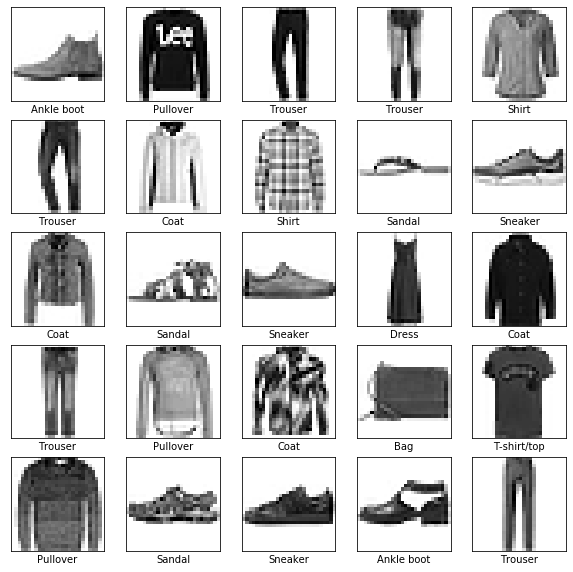

In [ ]:
# ------------------------------
# Display first 25 images of the test dataset
#------------------------------
# Display the first 25 images from the test set and display the class name below each image. Verify that the 
# data is in the correct format and we're ready to build and train the network.

n = 25  # Note: subplot parameter product must equal n (example 5 * 5 = 25)  cmap=plt.cm.RdYlGn

plt.figure(figsize=(10,10))
for i in range(n):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
plt.show()

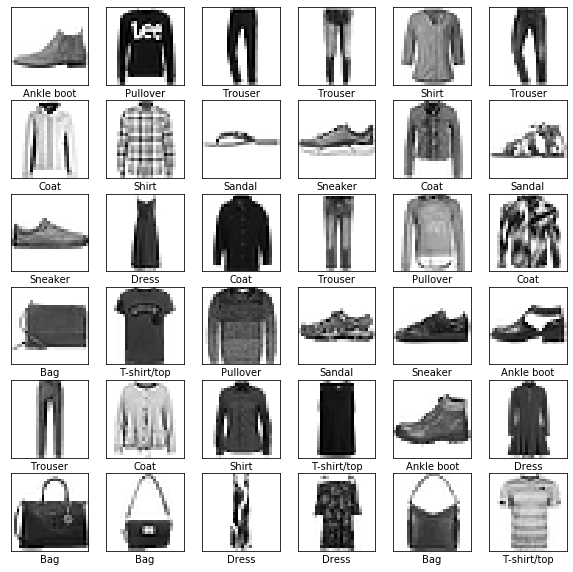

In [ ]:
# ------------------------------
# Display first 36 images of the test dataset
#------------------------------
# Display the first 36 images from the test set and display the class name below each image. Verify that the 
# data is in the correct format and we're ready to build and train the network.

n = 36  # Note: subplot parameter product must equal n (example 6 * 6 = 36)  cmap=plt.cm.RdYlGn

plt.figure(figsize=(10,10))
for i in range(n):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
plt.show()

In [ ]:
# So the model is most confident that this image is an ankle boot, or class_names[9]. And we can check the test label to see 
# this is correct:

test_labels[0]

9

In [ ]:
#------------------------------
# Graph the Predictions
#------------------------------

# We can graph this to look at the full set of 10 class predictions

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
    

In [ ]:
predictions[0]

array([6.4347978e-06, 3.3266572e-09, 2.0756374e-07, 7.5620440e-11,
       4.7635335e-06, 5.2477987e-03, 2.6209641e-08, 1.7091258e-03,
       1.5827787e-08, 9.9303162e-01], dtype=float32)

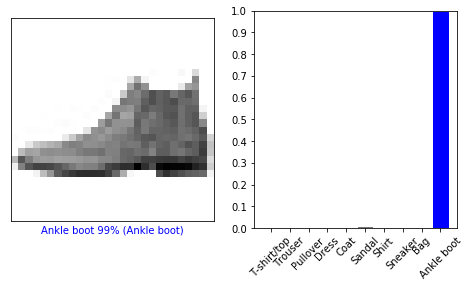

In [ ]:
# Let's look at the 0th image, predictions, and prediction array.

i = 0
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.yticks(np.arange(0, 1.1, .1))
plt.show()

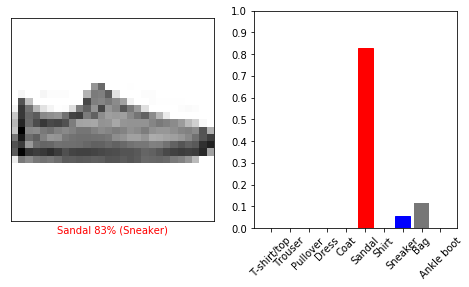

In [ ]:
i = 12
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.yticks(np.arange(0, 1.1, .1))
plt.show()

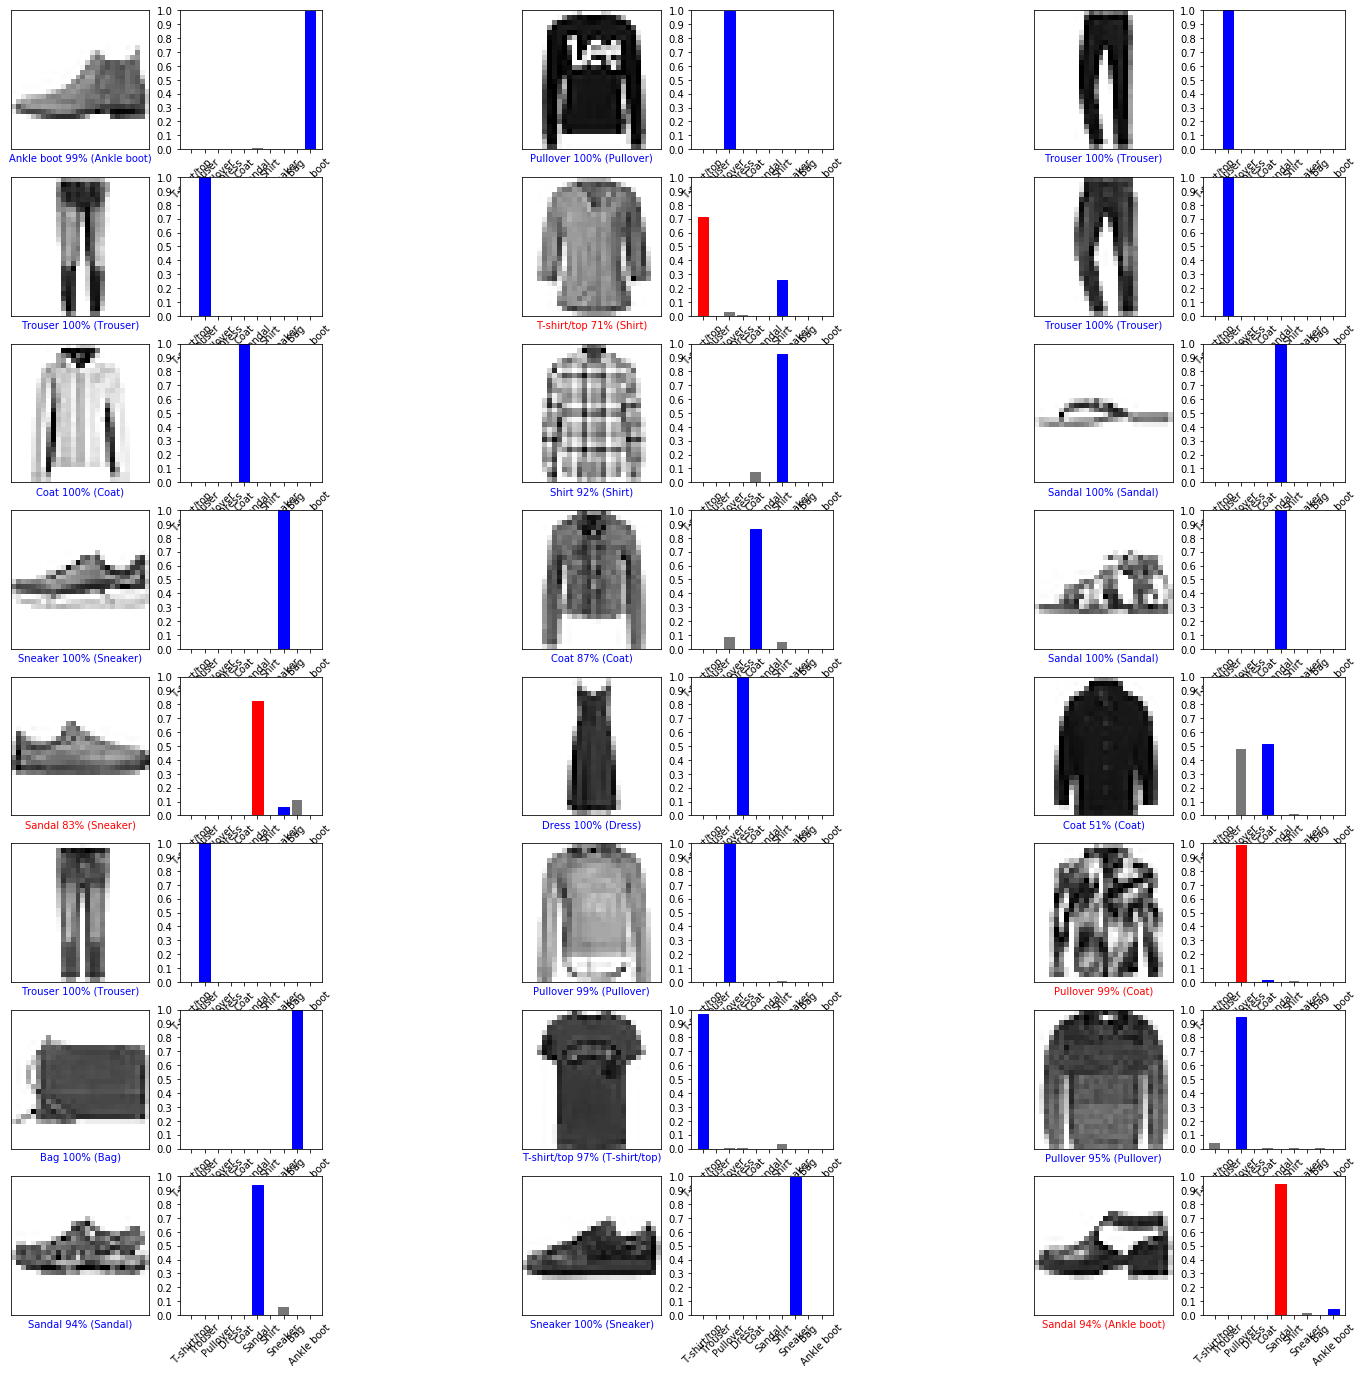

In [ ]:
# Let's plot several images with their predictions. Correct prediction labels are blue and incorrect prediction 
# labels are red. The number gives the percent (out of 100) for the predicted label. Note that it can be wrong even when 
# very confident.

# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red

num_rows = 8
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(3*3*num_cols, 3*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 3*num_cols, 3*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 3*num_cols, 3*i+2)
  plot_value_array(i, predictions[i], test_labels)
  plt.xticks(range(10), class_names, rotation=45)
  plt.yticks(np.arange(0, 1.1, .1))
plt.show()

##### Make a Single Prediction

In [ ]:
# Finally, use the trained model to make a prediction about a single image.

# Grab an image from the test dataset
i_test = 45
img = test_images[i_test]

print(img.shape)

(28, 28)


In [ ]:
# tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. 
# So even though we're using a single image, we need to add it to a list:


# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
# Now predict the image:

predictions_single = model.predict(img)

print(predictions_single)

[[6.2117429e-06 1.0655531e-05 4.3437472e-06 5.9454649e-08 7.4255763e-06
  1.5437828e-01 1.4464149e-06 7.7544498e-01 8.8155051e-05 7.0058405e-02]]


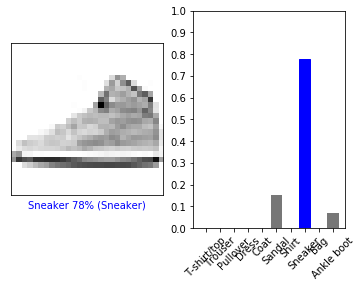

In [ ]:
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
plot_image(i_test, predictions[i_test], test_labels, test_images)

plt.subplot(1,2,2)
plot_value_array(i_test, predictions_single[0], test_labels)
plt.yticks(np.arange(0, 1.1, .1))
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [ ]:
# model.predict returns a list of lists, one for each image in the batch of data. Grab the predictions for our (only) 
# image in the batch:

prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

# And the model predicts a label of 2. (Pull-Over) - No, it,s a Cartigan, but thanks for asking

# Note: 7 is for Image 45

7


# Stop Here - This is from another project as reference

In [ ]:
#
# Load the MNIST dataset
#
#   with_info = True     : Loads the data in a 2-tuple structure [input, target]
#   as_supervised = True : Provides a tuple containing info about version, features, # of samples of the dataset
#
mnist_dataset, mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True)

mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']
#mnist_train, mnist_test = mnist_dataset[0], mnist_dataset[1]



In [ ]:
#
# Split dataset into validation samples - arbitrily 10% of the train dataset
#
num_validation_samples = 0.1 * mnist_info.splits['train'].num_examples
num_validation_samples = tf.cast(num_validation_samples, tf.int64)
#num_validation_samples_int = int(num_validatons_samples)

num_test_samples = 0.1 * mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples, tf.int64)
#num_test_samples_int = int(num_test_samples)
#
# Scale Data
#
def scale(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255.  # 255. signified result should be a float value
    return image, label

scaled_train_and_validation_data = mnist_train.map(scale)

In [ ]:
#
# Scale the Data
# --------------
#   finally, we scale and batch the test data
#   we scale it so it has the same magnitude as the train and validation
#   there is no need to shuffle it, because we won't be training on the test data
#   there would be a single batch, equal to the size of the test data
#
test_data = mnist_test.map(scale)



In [ ]:
#test_data.describe

In [ ]:
#
#  Data Shuffling (random)
#

#tf.keras.constraints.UnitNorm(axis=1)(tf.cast((num_validation_samples, tf.float64)))

BUFFER_SIZE = 10000
#
shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
#validation_data = shuffled_train_and_validation_data.take(6000)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)
#train_data = shuffled_train_and_validation_data.skip(6000)

BATCH_SIZE = 100

train_data = train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
#validation_data = validation_data.batch(6000)

test_data = test_data.batch(BATCH_SIZE)


#
# The MNIST data is iterable and in 2-tuple format (as_supervised=True), so we need to the valdation dataset to have 
# the same shape and object properties as the train and test data.
#
#   iter() - creates an object which can be iterated one element at a time - for example in a FOR or WHILE loop
#
validation_inputs, validation_targets = next(iter(validation_data))

In [ ]:
print ("Number of Validations samples: ", num_validation_samples)
print ("Number of Test samples: ", num_test_samples)

### Model

#### Outline the Model

In [ ]:
#
# MNIST Dataset: Has 784 Input Layers, and 10 Output Layers (One for each number 0-9). 
#               There will be two (or 3 or more) Hidden Layers of 50 nodes each. Width and Depth are hyper-parameters.
#

input_size        = 784
output_size       = 10
hidden_layer_size = 200   # Change this vlaue for better model accuracy. First we tried 50, then re-ran with 100, then 200

#
# tf.keras.layers.Flatten(original shape) - Transforms or flattens a tensor into a vector - in this case 28 x 28 = 784
# tf.keras.layers.Dense(output_size) - Takes the inputs, provided by the model and calculates the dot product of the inputs
#                                      an the weights and adds the bias. Also, this is where we apply the activation
#                                      function.
#
model = tf.keras.Sequential([
                            tf.keras.layers.Flatten(input_shape=(28,28,1)),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),   # 1st hidden layer
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),   # 2nd hidden layer
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),   # 3rd hidden layer
                            tf.keras.layers.Dense(output_size, activation='softmax')
                            ])

#### Choose the optimizer and the loss function

In [ ]:
#
# Optimizer: 'adam' = adaptive ...
# Loss     : binary_crossentropy
#          : categorial_crossentropy (Expects that you've one-hot encoded the targets)
#          : sparse_categorial_crossentropy (Applies one-hot encoding)
#

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Training

In [ ]:
#
# Inside an Epoch
#
# 1. At the beginning of each epoch, the training loss will be set to 0
# 2. The algorithm will iterate over a preset number of batches, all from train_data
# 3. The weights and biases will be updated as many times as there are batches
# 4. We will get a value for the loss function, indicating how training is going.
# 5. We will see the training accuracy
# 6. At the end of the epoch, the algorithm will forward propagate the whole validation set
#
# When we reach the maximum number of epochs, the training will be over
#
#  5  Epochs
# 540 Batches
# Training Loss should decrease
# Accuracy should increase
#

NUM_EPOCHS = 5

model.fit(train_data, epochs = NUM_EPOCHS, validation_data=(validation_inputs, validation_targets), verbose=2)

#### Test the Model

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data)

In [ ]:
print ("Test loss: {0:.2f}. Test Accuracy: {1:.2f}%".format(test_loss, test_accuracy*100.))